   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


Output()

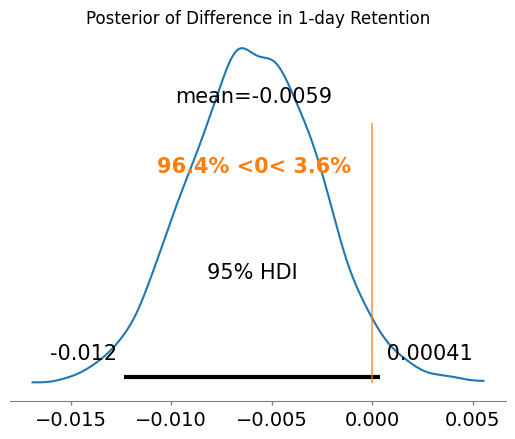

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
p_a    0.448  0.002     0.443      0.453        0.0      0.0    4000.0   
p_b    0.442  0.002     0.438      0.447        0.0      0.0    4068.0   
delta -0.006  0.003    -0.012      0.000        0.0      0.0    4044.0   

       ess_tail  r_hat  
p_a      3082.0    1.0  
p_b      2830.0    1.0  
delta    2904.0    1.0  


Output()

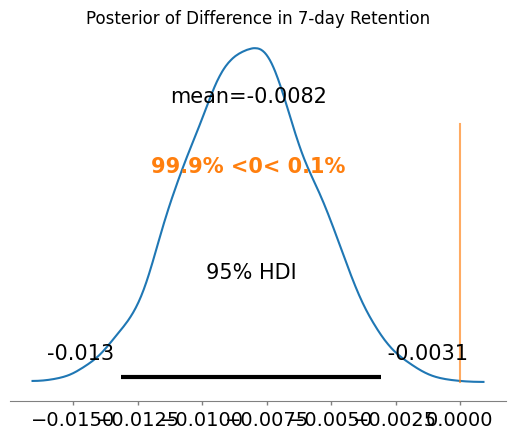

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
p_a    0.190  0.002     0.187      0.194        0.0      0.0    4284.0   
p_b    0.182  0.002     0.179      0.186        0.0      0.0    3912.0   
delta -0.008  0.003    -0.013     -0.003        0.0      0.0    4016.0   

       ess_tail  r_hat  
p_a      3232.0    1.0  
p_b      3126.0    1.0  
delta    3201.0    1.0  


In [1]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load the data
data = 'https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv'
df = pd.read_csv(data)

# Preview data
print(df.head())

df['retention1'] = df['retention_1'].astype(int)
df['retention7'] = df['retention_7'].astype(int)

# Separate data by group (a = gate_30, control, and b = gate_40, moved)
a_gate_30 = df[df['version'] == 'gate_30']
b_gate_40 = df[df['version'] == 'gate_40']

def bayesian_ab_test(success_a, total_a, success_b, total_b, group_label="1-day Retention"):
    with pm.Model() as model:
        # Prior distributions for the two groups' retention rates
        p_a = pm.Beta('p_a', alpha=1, beta=1)
        p_b = pm.Beta('p_b', alpha=1, beta=1)

        # Likelihood for observed data
        obs_a = pm.Binomial('obs_a', n=total_a, p=p_a, observed=success_a)
        obs_b = pm.Binomial('obs_b', n=total_b, p=p_b, observed=success_b)

        # Define difference in proportions
        delta = pm.Deterministic('delta', p_b - p_a)

        # Sample from the posterior
        trace = pm.sample(2000, tune=1000, return_inferencedata=True)

    # Plot posterior distribution
    az.plot_posterior(trace, var_names=['delta'], ref_val=0, hdi_prob=0.95)
    plt.title(f"Posterior of Difference in {group_label}")
    plt.show()

    summary = az.summary(trace, hdi_prob=0.95)
    print(summary.loc[['p_a', 'p_b', 'delta']])
    return summary.loc['delta']

# Run for 1-day retention
delta1 = bayesian_ab_test(
    success_a=a_gate_30['retention1'].sum(),
    total_a=len(a_gate_30),
    success_b=b_gate_40['retention1'].sum(),
    total_b=len(b_gate_40),
    group_label="1-day Retention"
)

# Run for 7-day retention
delta7 = bayesian_ab_test(
    success_a=a_gate_30['retention7'].sum(),
    total_a=len(a_gate_30),
    success_b=b_gate_40['retention7'].sum(),
    total_b=len(b_gate_40),
    group_label="7-day Retention"
)
# AI was utilized for troubleshooting code.